## Data Analytics | Python

Data Source:
Use the provided sales data in spreadsheet format. The data contains information about sales transactions, including date, product, quantity, and revenue.

Data source file:
https://docs.google.com/spreadsheets/d/1KagwoQLy1quKvT_82amuS-x3UnsoIX4J6p02ewbjQNA/edit?usp=sharing

Perform basic data exploration and visualization using the provided dataset, "Global-Superstore." Develop your own data storytelling narrative based on the insights you uncover.

Evaluation Criteria:
Data Exploration: Thoroughness in understanding the dataset and initial insights.
Data Visualization: Clarity, accuracy, and effectiveness of visualizations.
How to Submit:
Ensure your Python script or Jupyter Notebook is well-documented with comments explaining your code.
Include your name in the file name (e.g., data_exploration_YourName.py or data_exploration_YourName.ipynb).
Place all relevant files into a single folder.
Submit the entire folder as a compressed file (e.g., ZIP format).
And share it with us at aman@naqueens.com and cc archana@napqueens.com

Power BI Assessment: https://docs.google.com/document/d/1IuBvcyB81k5Ucz2QcZjlr8xQRJpdpMhMLSVVYGX_k78/edit?usp=sharing



Note: Both Power BI as well as the main task is mandatory



# Loading Dataset

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Importing the dataset as Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/dataset/Global-Superstore.csv')

In [4]:
df.head() # Data preview

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
df = df.drop(['Row ID'], axis=1) # Dropping the Row ID column

# Structure of the Dataset

In [6]:
df.shape

(51290, 23)

23 Attributes with 51290 records

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        51290 non-null  object 
 1   Order Date      51290 non-null  object 
 2   Ship Date       51290 non-null  object 
 3   Ship Mode       51290 non-null  object 
 4   Customer ID     51290 non-null  object 
 5   Customer Name   51290 non-null  object 
 6   Segment         51290 non-null  object 
 7   City            51290 non-null  object 
 8   State           51290 non-null  object 
 9   Country         51290 non-null  object 
 10  Postal Code     9994 non-null   float64
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51290 non-null  object 
 17  Sales           51290 non-null 

**Interpretation:** To figure out between Categorical and Numerical attributes of the Dataset

# Type Conversion

In [8]:
# Converting Postal Code as Object, since it was to be considered as Categorical Variable
df = df.astype({'Postal Code': 'object'})

# Converting Order Date and Ship Date from Object to Datetime
df = df.astype({'Order Date': 'datetime64[ns]'})
df = df.astype({'Ship Date': 'datetime64[ns]'})

In [9]:
df.isnull().sum()

,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0
Country,0


**Interpretation:** Postal Code has all of null values

In [10]:
df.median(numeric_only=True)

,0
Sales,85.053
Quantity,3.000
Discount,0.000
Profit,9.240
Shipping Cost,7.790


In [11]:
# To understand the Descriptive Statistics of Numerical Attributes from the Dataset
df.describe(include=['float64', 'int64'])

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915
std,487.565361,2.278766,0.212280,174.340972,57.296804
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


**Interpretation:**

Sale: 75% of the Sale occurs around the mean value (Distribution is Positively Skewed).

Quantity: Each Order varies from 1 to 14 order quantities with minimum standard deviation.

Discount: 50% of the Product doesn't received any discounts. Maximum discount was 85%.

Profit: Highly varing (depends on other factors as well).

Shipping cost: 75% of the shipping cost are around the mean value.



In [12]:
# Descriptive Statistics for Categorical Attributes (frequencies of most occured record)
df.describe(include=['object'])

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Order Priority
count,51290,51290,51290,51290,51290,51290,51290,51290,9994.0,51290,51290,51290,51290,51290,51290,51290
unique,25035,4,1590,795,3,3636,1094,147,631.0,7,13,10292,3,17,3788,4
top,CA-2014-100111,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,United States,10035.0,APAC,Central,OFF-AR-10003651,Office Supplies,Binders,Staples,Medium
freq,14,30775,97,108,26518,915,2001,9994,263.0,11002,11117,35,31273,6152,227,29433


**Interpretation:**

-> 60% of the Ship Mode was "Standard Class"

-> 50% of the orders are from "Consumer" Segment

-> 60% of the orders are "Office Suppies"

-> 57% of the orders are "Medium" Priority

-> PO-18850 has placed maximum number of order (can be used for future discounts/offers for being active user)

In [13]:
# Categorical Attributes are converted from "Object" to "Category" type for MEMORY EFFICIENCY

columns = ["Ship Mode", "Customer Name", "Segment", "City", "State", "Country", "Postal Code", "Market", "Region", "Category", "Sub-Category", "Product Name", "Order Priority"]
df[columns] = df[columns].astype('category')

In [14]:
df.describe(include=['datetime64[ns]'])

,Order Date,Ship Date
count,51290,51290
mean,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528
min,2011-01-01 00:00:00,2011-01-03 00:00:00
25%,2012-06-19 00:00:00,2012-06-23 00:00:00
50%,2013-07-08 00:00:00,2013-07-12 00:00:00
75%,2014-05-22 00:00:00,2014-05-26 00:00:00
max,2014-12-31 00:00:00,2015-01-07 00:00:00


**Interpretation:** Dataset contains Order details from 2011 to 2014


# Duplicate Handling

In [15]:
df.duplicated().sum()

0

# Additional Parameter (Derived)

In [16]:
# The time taken between placing the order and order delivery
df['Lead Time'] = (df['Ship Date'] - df['Order Date']).dt.days

In [17]:
df['Lead Time'].describe()

,Lead Time
count,51290.000000
mean,3.969370
std,1.729437
min,0.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


**Interpretation:** The Maximum Number of Days was A week, The Minimum Number of Days was 0 (order placed and shipped on the same day)

In [18]:
df[['Customer ID','Customer Name','Product ID','Product Name','City','Ship Mode','Lead Time']].sort_values(by = 'Lead Time').head()

,Customer ID,Customer Name,Product ID,Product Name,City,Ship Mode,Lead Time
0,RH-19495,Rick Hansen,TEC-AC-10003033,Plantronics CS510 - Over-the-Head monaural Wir...,New York City,Same Day,0
2354,EJ-13720,Ed Jacobs,FUR-CH-10002510,"Office Star Steel Folding Chair, Adjustable",Jakarta,Same Day,0
12704,DB-13270,Deborah Brumfield,FUR-CH-10004751,"Hon Steel Folding Chair, Black",Toowoomba,Same Day,0
12699,SC-20305,Sean Christensen,FUR-FU-10002937,"Rubbermaid Light Bulb, Durable",Benidorm,Same Day,0
12692,BB-10990,Barry Blumstein,FUR-BO-10004316,"Bush 3-Shelf Cabinet, Pine",Magdeburg,Same Day,0


In [19]:
# Calculating the Unit Price of each order from Sales, Quantity and Discount Attributes
df['Unit Price'] = df['Sales'] / (df['Quantity'] * (1 - df['Discount']))

In [20]:
# Calculating the Unit Profit from each order
df['Unit Profit'] = df["Profit"] / df["Sales"]

In [21]:
df['Unit Profit'].describe()

,Unit Profit
count,51290.000000
mean,0.047430
std,0.465667
min,-4.733542
25%,0.000000
50%,0.169178
75%,0.333139
max,0.500000


**Interpretation:** Global Super Store has faced huge loss of -4.7 per product. Average unit profit is also very mininum.

# Visualization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

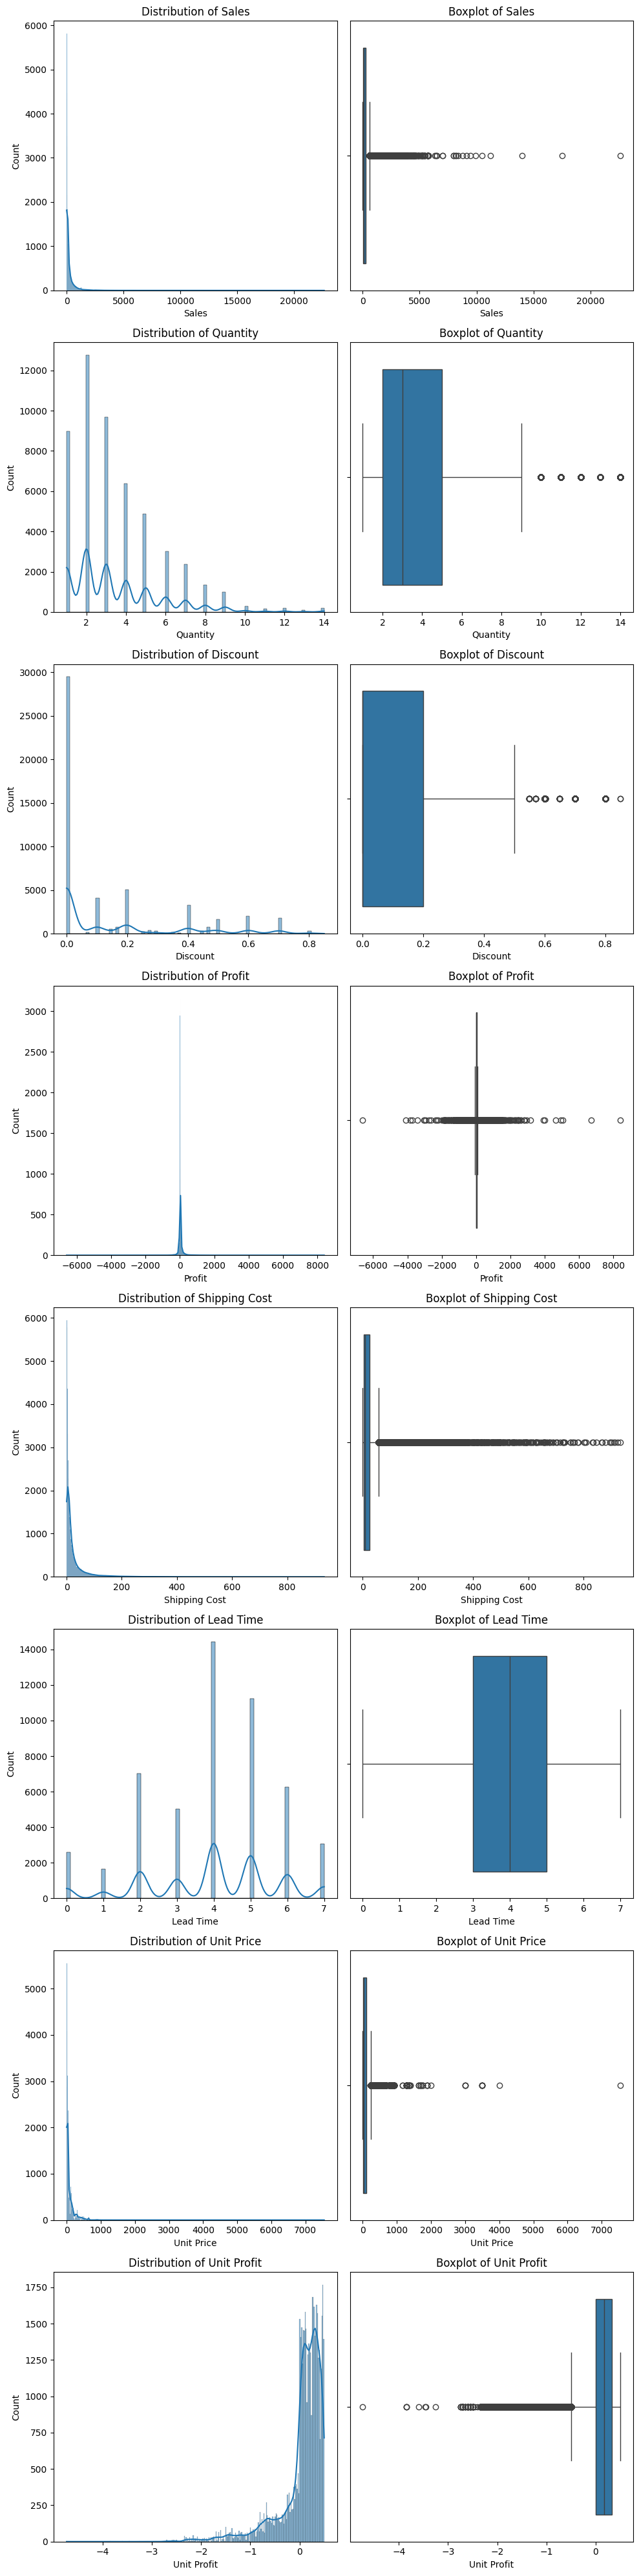

In [23]:
# Visualization numerical attruibutes Distributions and Out Liers

numeric_col = df.select_dtypes(include=['float64', 'int64']).columns # To select numerical columns

fig, axes = plt.subplots(nrows=len(numeric_col), ncols=2, figsize=(10, 5*len(numeric_col)))

for i, col in enumerate(numeric_col):
  sns.histplot(df[col], kde=True, ax = axes[i,0]) # Histogram
  axes[i, 0].set_title(f'Distribution of {col}')
  sns.boxplot(x=df[col], ax=axes[i, 1]) # Boxplot
  axes[i, 1].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

**Interpretation:**

Sales, Discount, Shipping and Unit print are highly Right Skewed (Positively Skewed)

Unit Profit is Left Skewed (Negatively Skewed)

<ipython-input-24-7507dd4f2208>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  order_counts = df.groupby(['Order Year', 'Category']).size().reset_index(name='counts') # Groupby for getting combined results


Text(0.5, 1.0, 'Distribution of Orders over Years')

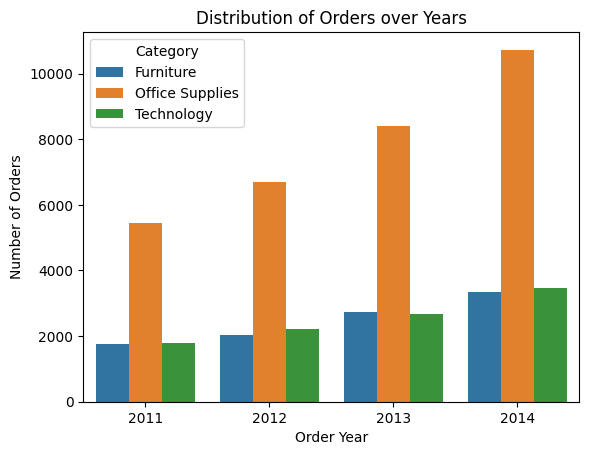

In [24]:
# To understand the demend of different Category of Product over the years

df['Order Year'] = df['Order Date'].dt.year # to extract Year from Order Date
order_counts = df.groupby(['Order Year', 'Category']).size().reset_index(name='counts') # Groupby for getting combined results

sns.barplot(x=order_counts['Order Year'], y=order_counts['counts'], hue =order_counts['Category'])
plt.xlabel('Order Year')
plt.ylabel('Number of Orders')
plt.legend(title='Category')
plt.title('Distribution of Orders over Years')

**Interpretation:** Through out the years "Office Supplies" has the Highest Number of Orders compared with other Categories Products.

Demend and Forecast Analysis should be conducted for Office Supplies to meet the consumer's demends.

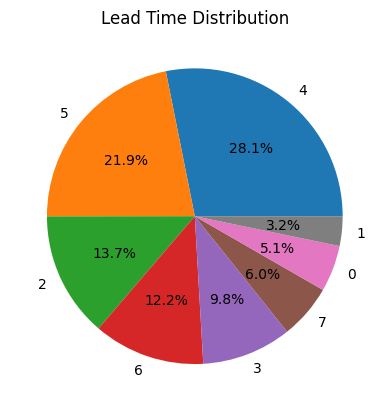

In [25]:
# To understand the Lead Time scenario in Global Superstore

leadtime_dist = (df['Lead Time'].value_counts()/(len(df)))*100 # returns percentage results

fig,ax = plt.subplots()
ax.pie(leadtime_dist, labels=leadtime_dist.index, autopct='%1.1f%%') # Pie chart
ax.set_title('Lead Time Distribution')
plt.show()

**Interpretation:** 28% of the Orders takes 4 days for Shipping, where only 5% of the Customer prefer "Same Day"

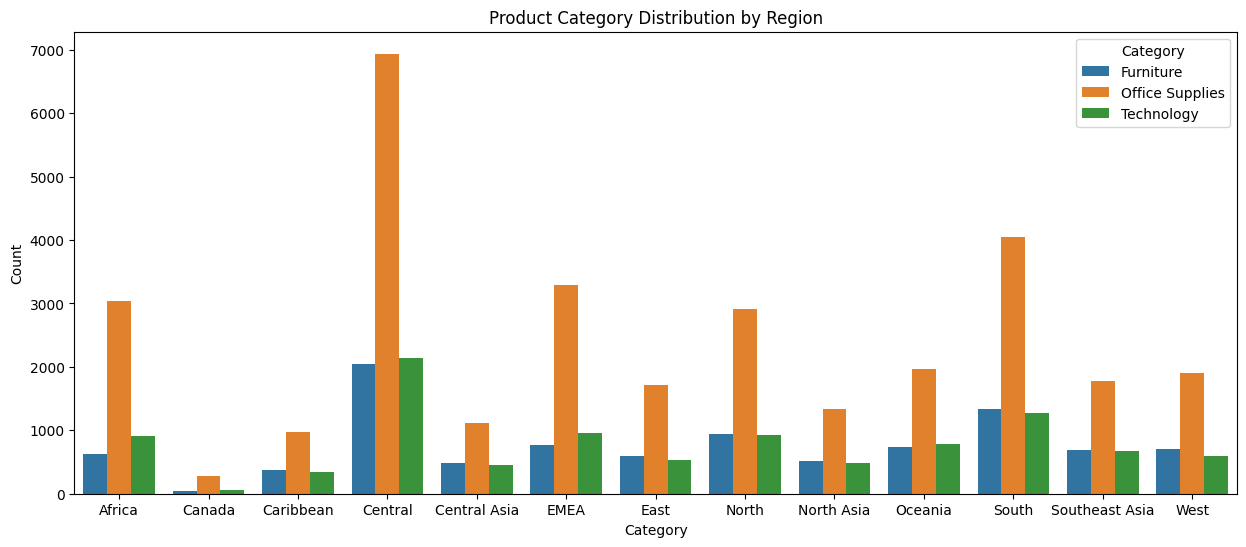

In [37]:
# To understand how differnt Region People consume different Category of Products

plt.figure(figsize=(15, 6))
sns.countplot(x=df['Region'], hue=df['Category'])

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Product Category Distribution by Region')
plt.legend(title='Category')

plt.show()

**Interpretation:**

-> Overall Office Supplies products are highly consumed irrespective of the Region

-> Africa and EMEA consumes more Technological products then Furniture, whereas South region focus slight more on Furnitures then Technology

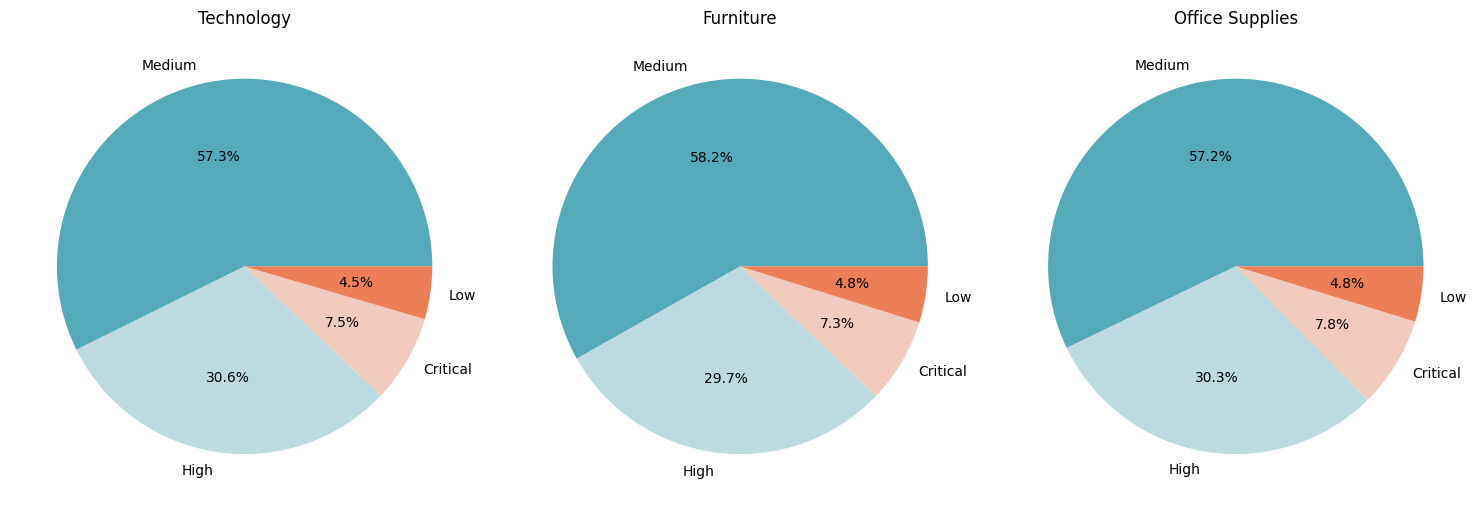

In [47]:
# To understand how priority varies with differnt Category

categories = df['Category'].unique()
fig, axs = plt.subplots(1, len(categories), figsize=(15, 5))

for i, category in enumerate(categories):
    category_data = df[df['Category'] == category] # Filter data for the current category
    priority_counts = category_data['Order Priority'].value_counts()

    # Pie chart
    axs[i].pie(priority_counts, labels=priority_counts.index, autopct='%1.1f%%', colors=sns.diverging_palette(210,25, l= 65, center ='light', as_cmap = False, n= len(priority_counts)))
    axs[i].set_title(f'{category}')

plt.tight_layout()
plt.show()

**Interpretation:**

-> Overall the Distribution of Priority among different Categories are same.